# Quality factor determination in whispering gallery mode microcavities
---

### Loading useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from SettingPLOTs import *
from scipy import constants, special
from numpy import arccosh, tanh
from sympy import symbols, sqrt, diff, lambdify

π, c = constants.pi, constants.c

## 1. Material absorption

$$Q_\text{mat} = 4.3\times10^3\left(\frac{2\pi n}{\alpha\lambda}\right)$$

$\alpha$ in units of dB/km

Ref.:

Whispering gallery mode microresonators: Fundamentals and applications.

Authors: G. C. Righini, Y. Dumeige, P. Féron, M. Ferrari, G. Nunzi Conti, D. Ristic, S. Soria.

DOI: 10.1393/ncr/i2011-10067-2

In [2]:
fname = 'Data/Attenuation-silica.csv'
df = pd.read_csv(fname, names=['λ (μm)', 'α (dB/km)'])
df.head()

,λ (μm),α (dB/km)
0,0.667577,3.746434
1,0.673812,3.631329
2,0.680827,3.507579
3,0.687062,3.399813
4,0.693297,3.283952


In [3]:
B1, B2, B3 = 0.6961663, 0.4079426, 0.8974794
C1, C2, C3 = 68.4043, 116.2414, 9896.161 # in nm

x = symbols('x')

n = sqrt(1+(B1*x**2)/(x**2-C1**2)+(B2*x**2)/(x**2-C2**2)+(B3*x**2)/(x**2-C3**2))

In [4]:
Ridx = lambdify(x, n, 'numpy')(1e3*df['λ (μm)'])
Qmat = 1e6*(4.3e3)*2*π*Ridx/df['α (dB/km)']/df['λ (μm)']

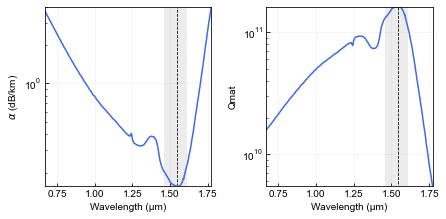

In [5]:
fig, axs = plt.subplots(1, 2, figsize=cm2inch(16,8))

axs[0].plot(df['λ (μm)'], df['α (dB/km)'], c='royalblue')
axs[0].vlines(x=df['λ (μm)'][df['α (dB/km)'].idxmin()], ymin=df['α (dB/km)'][df['α (dB/km)'].idxmin()], ymax=df['α (dB/km)'][df['α (dB/km)'].idxmax()], color='k', ls='--', lw=0.8)
axs[0].axvspan(1.46, 1.61, color='grey', alpha=0.15, lw=0)
axs[0].set_yscale('log')
axs[0].set_xlabel('Wavelength (μm)')
axs[0].set_ylabel(r'$α$ (dB/km)')

axs[1].plot(df['λ (μm)'], Qmat, c='royalblue')
axs[1].axvspan(1.46, 1.61, color='grey', alpha=0.15, lw=0)
axs[1].vlines(x=df['λ (μm)'][Qmat.idxmax()], ymin=Qmat[df['α (dB/km)'].idxmin()], ymax=Qmat[df['α (dB/km)'].idxmax()], color='k', ls='--', lw=0.8)
axs[1].set_yscale('log')
axs[1].set_xlabel('Wavelength (μm)')
axs[1].set_ylabel('Qmat')

plt.tight_layout()
# plt.savefig('Figures/Qmat.svg')
plt.show()

## 2. Surface scattering

Vernooy's model:

$$Q_\text{ssA}=\frac{3n^2\left(n^2+2\right)^2}{(4\pi)^3\left(n^2-1\right)^{5/2}}\frac{\lambda^{7/2}D^{1/2}}{\sigma^2B^2}$$

Gorodestky's model:

$$Q_\text{ssB} = \frac{3\lambda^3D}{16\pi^2n\sigma^2B^2}$$

Ref.:

Dependence of quality factor on surface roughness in crystalline whispering-gallery mode resonators

Guoping Lin, Rémi Henriet, Aurélien Coillet, Maxime Jacquot, Luca Furfaro, Gilles Cibiel, Laurent Larger, and Yanne K. Chembo 

In [6]:
R = 125 # in μm
D = 2*R
σ, B = 0.4, 90 # in nm. Measured by AFM

QssA = 1e12*3*Ridx**2*(Ridx**2+2)**2*df['λ (μm)']**(7/2)*D**(1/2)/(4*π)**3/(Ridx**2-1)**(5/2)/σ**2/B**2
QssB = 1e12*3*df['λ (μm)']**3*D/16/π**2/Ridx/σ**2/B**2


σ_list = np.linspace(0.25,5,len(Ridx)) # in nm
λ0 = 1.55 # in μm
Ridx0 = lambdify(x, n, 'numpy')(1e3*λ0)

QssA1 = 1e12*3*Ridx0**2*(Ridx0**2+2)**2*λ0**(7/2)*D**(1/2)/(4*π)**3/(Ridx0**2-1)**(5/2)/σ_list**2/B**2
QssB1 = 1e12*3*λ0**3*D/16/π**2/Ridx0/σ_list**2/B**2

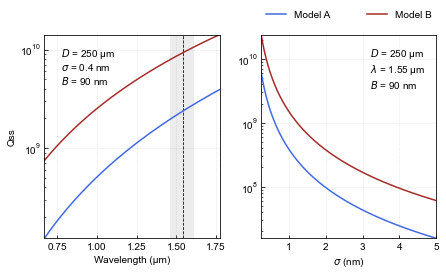

In [7]:
fig, axs = plt.subplots(1, 2, figsize=cm2inch(16,10))

axs[0].plot(df['λ (μm)'], QssA, label='Model A', c='royalblue')
axs[0].plot(df['λ (μm)'], QssB, label='Model B', c='brown')
axs[0].vlines(x=df['λ (μm)'][df['α (dB/km)'].idxmin()], ymin=QssA.min(), ymax=QssB.max(), color='k', ls='--', lw=0.8)
axs[0].axvspan(1.46, 1.61, color='grey', alpha=0.15, lw=0)
axs[0].set_yscale('log')
axs[0].set_xlabel('Wavelength (μm)')
axs[0].set_ylabel('Qss')
lenda0 = r'$D$ = {} μm'.format(D)+'\n'+r'$σ$ = {} nm'.format(σ)+'\n'+r'$B$ = {} nm'.format(B)
axs[0].text(.77, 4.4e9, lenda0)

axs[1].plot(σ_list, QssA1, label='Model A', c='royalblue')
axs[1].plot(σ_list, QssB1, label='Model B', c='brown')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$σ$ (nm)')
lenda1 = r'$D$ = {} μm'.format(D)+'\n'+r'$λ$ = {} μm'.format(λ0)+'\n'+r'$B$ = {} nm'.format(B)
axs[1].text(3.2, 3.5e9, lenda1)
axs[1].legend(bbox_to_anchor=(0., 1.05, 1., .102), loc='lower left', ncol=2, mode='expand', borderaxespad=0.1, frameon=False)

plt.tight_layout()
# plt.savefig('Figures/Qss.svg')
plt.show()

## 3. Water absorption

$$Q_\text{water}\sim\sqrt{\frac{\pi}{8n^3}} \frac{D^{1/2}}{\delta\lambda^{1/2}\beta_\text{w}(\lambda)}$$

where $\beta_\text{w}$ is water the absorption coefficient.

Ref.:

High-Q measurements of fused-silica microspheres in the near infrared

D. W. Vernooy, V. S. Ilchenko,* H. Mabuchi, E. W. Streed, and H. J. Kimble

The absorption coefficient ($\beta_\text{w}$) is related to the extinction coefficient ($k$) by the following formula::

$$\beta_\text{w} = \frac{4 \pi k}{\lambda}$$

where $λ$ is the wavelength. If $λ$ is in nm, multiply by 10⁶ to get the absorption coefficient in the units of 1/m.

Obs.: The extinction coefficient ($k$) has not units!

In [8]:
fname = 'Data/Wang-water-absorption.csv'
df = pd.read_csv(fname)
df.columns = ['λ (μm)', 'k (λ)']

fname = 'Data/Kedenburg-water-refractive-index.csv'
df1 = pd.read_csv(fname)
df1.columns = ['λ (μm)', 'n (λ)']
df1 = df1.iloc[0:100].astype('float')

In [9]:
D = 250 # in μm
δ = 0.2 # in nm

λi = 1.3 # max(df['λ (μm)'][0], df1['λ (μm)'][0])
λf = min(df['λ (μm)'].iloc[-1], df1['λ (μm)'].iloc[-1])

λ_vec = np.linspace(λi, λf, 100)
k_vec = np.interp(λ_vec, df['λ (μm)'], df['k (λ)'])
n_vec = np.interp(λ_vec, df1['λ (μm)'], df1['n (λ)'])

βw = 1e6*4*π*k_vec/λ_vec # in 1/m
Qwater = 1e9*np.sqrt(π/8/n_vec**3)*D**(1/2)/δ/λ_vec**(1/2)/βw

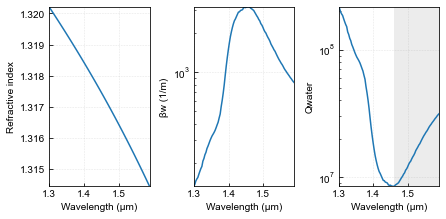

In [10]:
fig, axs = plt.subplots(1, 3, figsize=cm2inch(16,8))

axs[0].plot(λ_vec, n_vec)
axs[0].set_xlabel('Wavelength (μm)')
axs[0].set_ylabel('Refractive index')

axs[1].plot(λ_vec, βw)
axs[1].set_yscale('log')
axs[1].set_xlabel('Wavelength (μm)')
axs[1].set_ylabel('βw (1/m)')

axs[2].plot(λ_vec, Qwater)
axs[2].axvspan(1.46, λ_vec[-1], color='grey', alpha=0.15, lw=0)
axs[2].set_yscale('log')
axs[2].set_xlabel('Wavelength (μm)')
axs[2].set_ylabel('Qwater')

plt.tight_layout()
# plt.savefig('Figures/Qwater.svg')
plt.show()

## 4. Intrinsic Radiative Losses

$$Q_\text{rad} = \frac{1}{2}\left(l+\frac{1}{2}\right)n^{1-2b}\sqrt{n^2-1}\exp(2T_l)$$

onde

$$T_l = \left(l+\frac{1}{2}\right)(\eta_l-\tanh\eta_l)$$

$$\eta_l = \text{arccosh}\left\lbrace n\left[1-\frac{1}{l+\frac{1}{2}}\left(t_q^0\xi+\frac{l^{1-2b}}{\sqrt{l^2-1}}\right)\right]^{-1}\right\rbrace$$

$$\xi = \left[\frac{1}{2}\left(l+\frac{1}{2}\right)\right]^{1/3}$$

$$b = 0 \hspace{0,2cm} \text{modos TE}$$
$$b = 1 \hspace{0,2cm} \text{modos TM}$$

Ref.:

- Buck, J. R. and Kimble, H. J. (2003). Optimal sizes of dielectric microspheres for cavity QED with strong coupling, Phys. Rev. A 67, p. 033806.

In [11]:
def Qrad(R, λi, λf, pol, q):
    """
    R is the cavity radius in μm
    λi is the initial wavelength in μm
    λf is the final wavelength in μm
    pol is the polarization 'TE' or 'TM'
    q is the radial mode number
    """
    λ = np.arange(λi,λf,1e-2)
    nidx = sqrt(1+(B1*x**2)/(x**2-C1**2)+(B2*x**2)/(x**2-C2**2)+(B3*x**2)/(x**2-C3**2))
    n = lambdify(x, nidx, 'numpy')(1e3*λ)
    l = 2*π*n*R/λ
    
    if pol=='TE':
        b=0
    else:
        b=1
    
    α = l+1/2
    ξ = (α/2)**(1/3)
    tq0 = special.ai_zeros(q)[0][-1]
    ηl = arccosh(n/(1-1/α*(tq0*ξ+l**(1-2*b)/np.sqrt(l**2-1))))
    Tl = α*(ηl-tanh(ηl))
    Qrad = 1/2*α*n**(1-2*b)*np.sqrt(n**2-1)*np.exp(2*Tl)
    
    plt.plot(l, Qrad, label=f'$q$ = {q}')

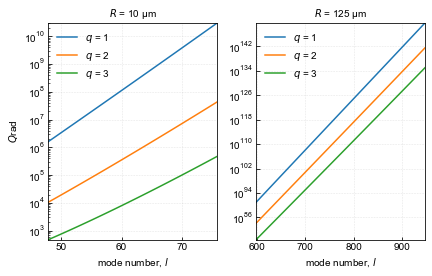

In [12]:
plt.subplots(1,2,figsize=cm2inch(15.5,10))

plt.subplot(1,2,1)
R1 = 10
for ii in np.arange(1, 4):
    Qrad(R=R1, λi=1.2, λf=1.9, pol='TE', q=ii)
plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.xlabel('mode number, $l$')
plt.ylabel(r'$Q$rad')
plt.title(f'$R$ = {R1} μm', fontsize=10)

plt.subplot(1,2,2)
R2 = 125
for ii in np.arange(1, 4):
  Qrad(R=R2, λi=1.2, λf=1.9, pol='TE', q=ii)
plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.xlabel('mode number, $l$')
plt.title(f'$R$ = {R2} μm', fontsize=10)

plt.tight_layout()
# plt.savefig('Figures/Qrad.svg')
plt.show()

For a given mode the radiative Q-factor associated with the TM polarization is slightly lower than the value associated with the TE polarization

$$Q_\text{rad}^\text{TE} > Q_\text{rad}^\text{TM}$$

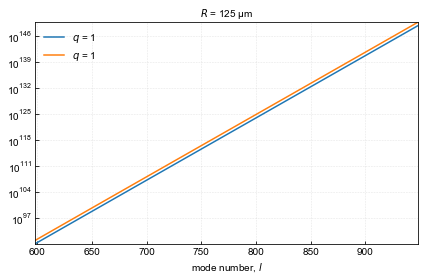

In [14]:
for ii in np.arange(1, 2):
    Qrad(R=R2, λi=1.2, λf=1.9, pol='TM', q=ii)
    Qrad(R=R2, λi=1.2, λf=1.9, pol='TE', q=ii)
plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.xlabel('mode number, $l$')
plt.title(f'$R$ = {R2} μm', fontsize=10)

plt.tight_layout()
plt.show()